In [38]:
#Importing all required libraries
import urllib.request
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import warnings
warnings.filterwarnings('ignore')# Suppress all warnings


In [39]:
#Data loading from Google drive
def load_csv_from_drive(file_id):
    url = f'https://drive.google.com/uc?id={file_id}'
    response = urllib.request.urlopen(url)
    data = response.read()
    df = pd.read_csv(io.BytesIO(data))
    return df

#Google drive Link
customers_file_id = "1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_file_id = "1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_file_id = "1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

#Creating DataFrame
cust_df = load_csv_from_drive(customers_file_id)
prod_df = load_csv_from_drive(products_file_id)
transactions_df = load_csv_from_drive(transactions_file_id)

#Exploratory Descriptive Analysis (EDA)

In [40]:
#Statistical Analysis
print("\n Customers  Info ")
print(cust_df.info())
print("\n Customers Description ")
print(cust_df.describe(include='all'))

print("\n Products Info ")
print(prod_df.info())
print("\n Products Description ")
print(prod_df.describe(include='all'))

print("\n Transactions Info ")
print(transactions_df.info())
print("\n Transactions Description ")
print(transactions_df.describe(include='all'))



 Customers  Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

 Customers Description 
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

 Products Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    ob

In [ ]:
print(cust_df.isnull().sum())
print()
print(prod_df.isnull().sum())
print()
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [44]:
# Merge datasets for comprehensive analysis
all_merged = transactions_df.merge(cust_df, on="CustomerID").merge(prod_df, on="ProductID")


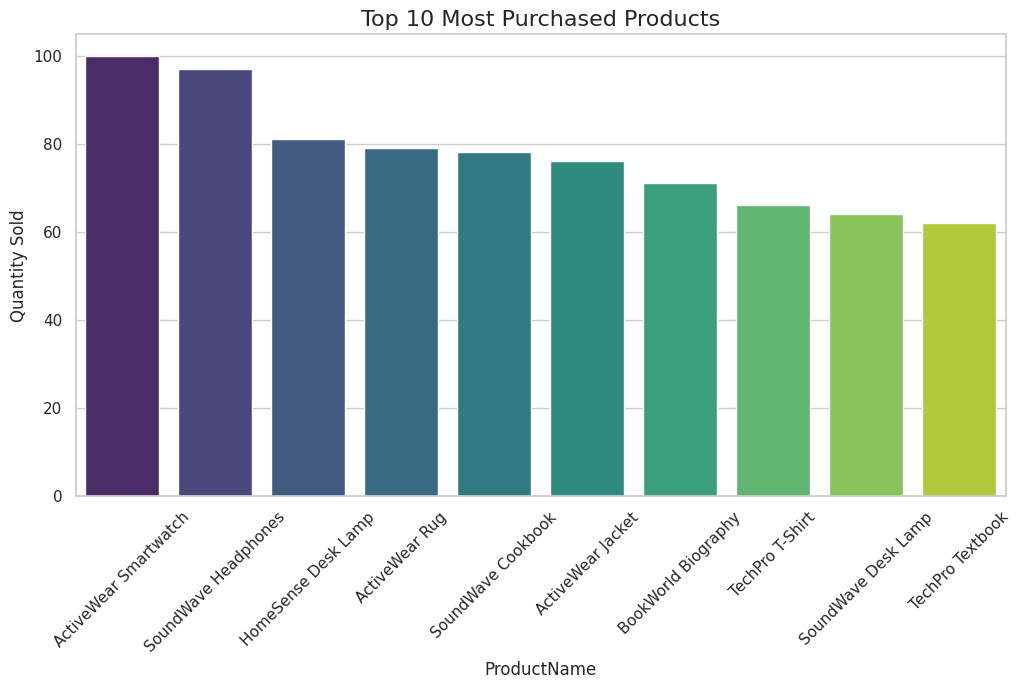

In [45]:
plt.figure(figsize=(12, 6))
product_sales = all_merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10], palette="viridis")
plt.title("Top 10 Most Purchased Products", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Quantity Sold")
plt.show()


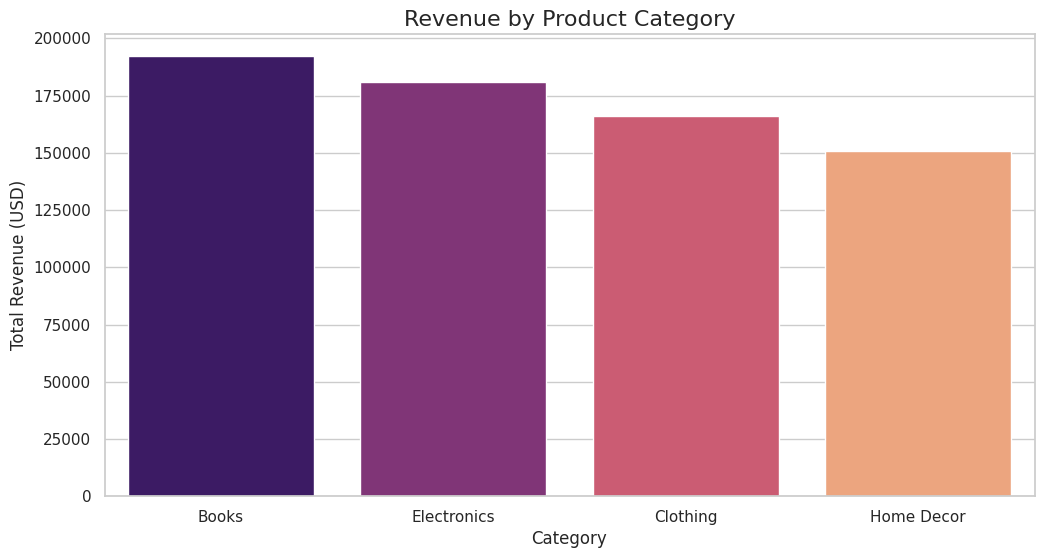

In [46]:
plt.figure(figsize=(12, 6))
category_revenue = all_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="magma")
plt.title("Revenue by Product Category", fontsize=16)
plt.ylabel("Total Revenue (USD)")
plt.show()

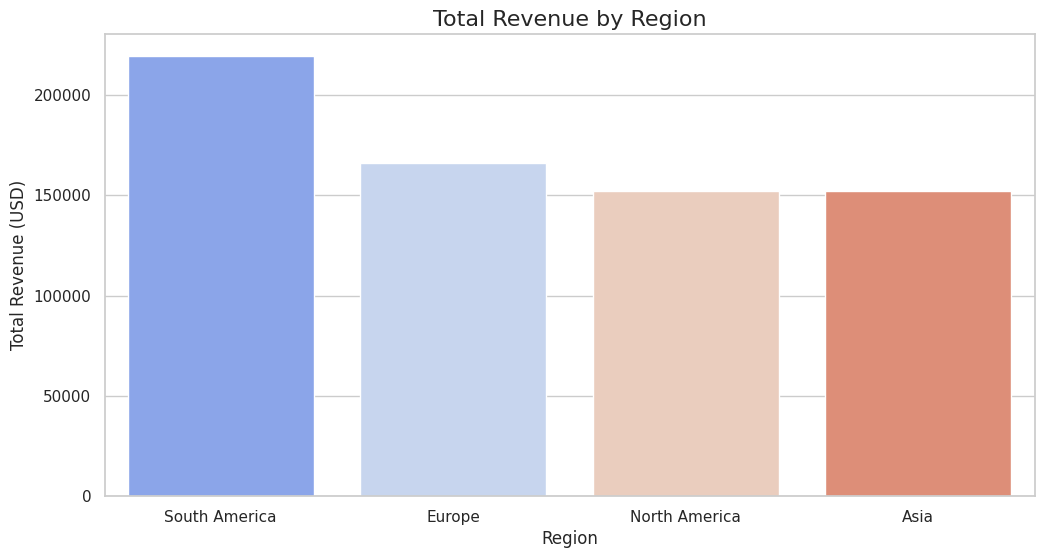

In [47]:
plt.figure(figsize=(12, 6))
region_revenue = all_merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="coolwarm")
plt.title("Total Revenue by Region", fontsize=16)
plt.ylabel("Total Revenue (USD)")
plt.show()

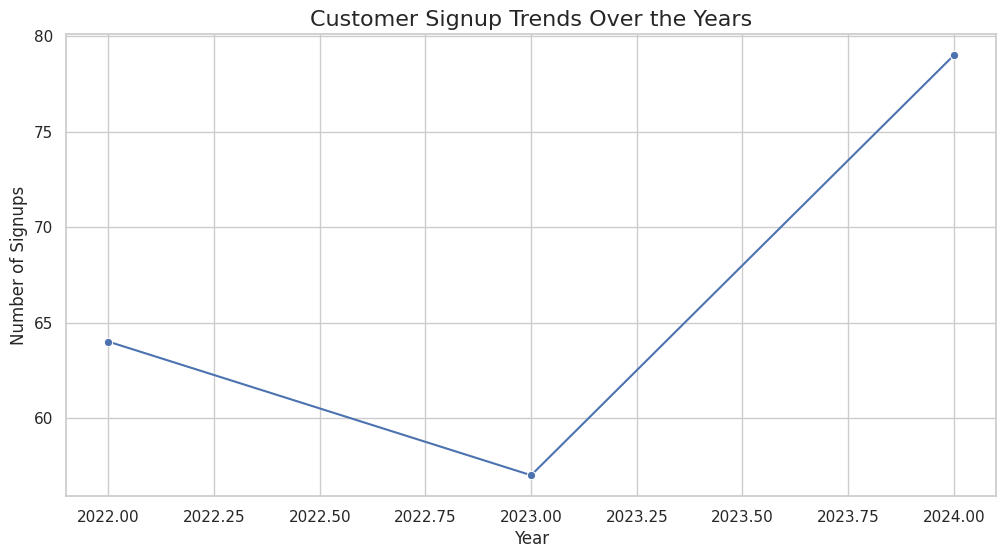

In [48]:
plt.figure(figsize=(12, 6))
cust_df['SignupDate'] = pd.to_datetime(cust_df['SignupDate'])
signup_trends = cust_df['SignupDate'].dt.year.value_counts().sort_index()
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker="o")
plt.title("Customer Signup Trends Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


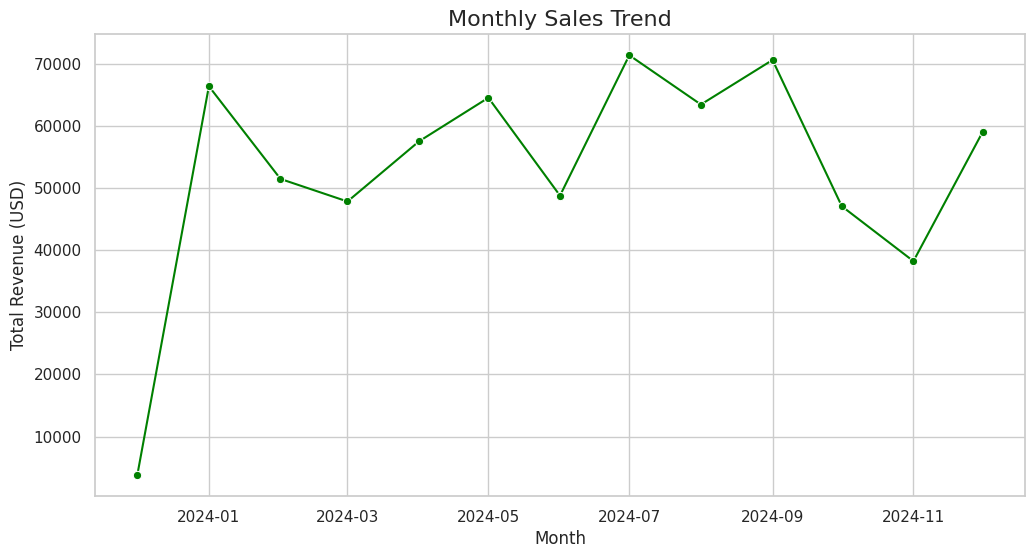

In [49]:
plt.figure(figsize=(12, 6))
all_merged['TransactionDate'] = pd.to_datetime(all_merged['TransactionDate'])
monthly_sales = all_merged.groupby(all_merged['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="green")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.show()


Most Popular Product in Each Region:
             Region            ProductName  Quantity
39            Asia      HomeSense T-Shirt        28
67          Europe         ActiveWear Rug        30
170  North America   SoundWave Headphones        37
196  South America  ActiveWear Smartwatch        38


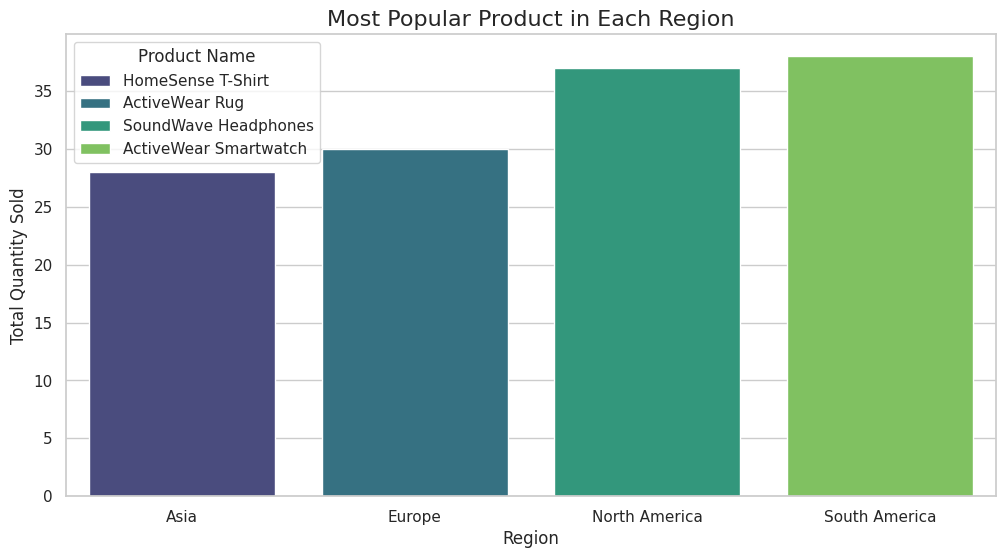

In [50]:
# Most Popular Product in Each Region
popular_products_by_region = (
    all_merged.groupby(['Region', 'ProductName'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(['Region', 'Quantity'], ascending=[True, False])
)

# Select the most popular product in each region
popular_products_by_region = popular_products_by_region.loc[
    popular_products_by_region.groupby('Region')['Quantity'].idxmax()
]

print("\nMost Popular Product in Each Region:\n", popular_products_by_region)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=popular_products_by_region,
    x='Region',
    y='Quantity',
    hue='ProductName',
    dodge=False,
    palette="viridis"
)
plt.title("Most Popular Product in Each Region", fontsize=16)
plt.ylabel("Total Quantity Sold")
plt.xlabel("Region")
plt.legend(title="Product Name")
plt.show()

In [52]:
# Average Order Value (AOV) by Region
aov_by_region = (
    all_merged.groupby('Region')['TotalValue']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Order Value (AOV) by Region:\n", aov_by_region)




Average Order Value (AOV) by Region:
 Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


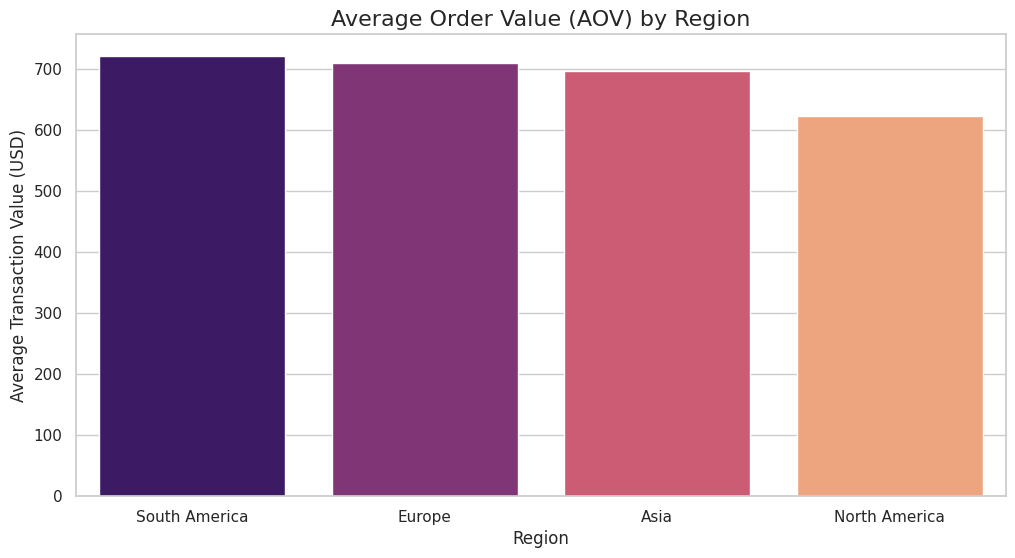

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=aov_by_region.index,
    y=aov_by_region.values,
    palette="magma"
)
plt.title("Average Order Value (AOV) by Region", fontsize=16)
plt.ylabel("Average Transaction Value (USD)")
plt.xlabel("Region")
plt.show()
